# 3. Real - Figures - Supplementary

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_real = pd.read_pickle("df_all_28_05_real.pkl") 
df_10k_bip = pd.read_pickle("df_all_04_06_real_bip.pkl")

df_real = df_real[(df_real.binning != "platt") | (df_real.n_data != 10000)]

df_bip2 = df_10k_bip[df_10k_bip.binning == "platt"]
df_real = pd.concat([df_real, df_bip2])

df_10k = df_10k_bip[(df_10k_bip.binning != "platt") & (df_10k_bip.n_data == 10000)]
df_real = pd.concat([df_real, df_10k])


In [3]:
df_real.head()

,model_name,tag_name,cgt_nr,seed,n_data,binning,n_bins,c_hat_distance_p,c_hat_distance_p_square,c_hat_distance_p_debiased,c_hat_distance_p_square_debiased,c_hat_distance_c,c_hat_distance_c_square,p_distance_c,p_distance_c_square,calibration_function
0,resnet110SD_c100,notag,-1,42,3000,KDE,-1,0.168627,0.031202,0.168627,0.031202,[0.30720370458441987],[0.1588739011516418],[0.47583062250415487],[0.28642289873708043],dirL2
1,resnet110SD_c100,notag,-1,42,3000,KDE_integral,-1,0.168224,0.031186,0.168224,0.031186,[0.30720370458441987],[0.1588739011516418],[0.47583062250415487],[0.28642289873708043],dirL2
2,resnet110SD_c10,notag,-1,42,1000,KDE,-1,0.0359151,0.007993,0.0359151,0.007993,[0.0829637116365067],[0.03100503660566855],[0.060838002502918244],[0.02215111640579881],dirODIR
3,resnet110SD_c10,notag,-1,42,1000,KDE_integral,-1,0.0287832,0.001472,0.0287832,0.001472,[0.0829637116365067],[0.03100503660566855],[0.060838002502918244],[0.02215111640579881],dirODIR
4,lenet5_c100,notag,-1,42,1000,KDE,-1,0.0368755,0.001969,0.0368755,0.001969,[0.640622699906785],[0.46284483562050444],[0.6491396564841271],[0.4774967530552702],VecS


In [4]:
df_real.binning = df_real['binning'].replace({
    "PW_NN4_CE_trick": "$PL_{NN}^{CE}$",
    "PW_NN4_MSE_trick": "$PL_{NN}^{MSE}$",
    "PW_NN6logscaleO_CE_trick": "$PL3^{CE}$",
    "PW_NN6logscaleO_MSE_trick": "$PL3^{MSE}$",
    "PW_NN4_MSE": "$PL_{NN}^{MSE}-notrick$",
    "PW_NN6logscaleO_CE": "$PL3^{CE}-notrick$",
    "eq_size_10": "$ES_{10}$",
    "eq_size_15": "$ES_{15}$",
    "eq_size_20": "$ES_{20}$",
    "eq_size_CV10tr": "$ES_{CV}$",
    "eq_size_CV10": "$ES_{CV}-notrick$",
    "monotonic_eq_size": "$ES_{sweep}$",
    "eq_width_10": "$EW_{10}$",
    "eq_width_15": "$EW_{15}$",
    "eq_width_20": "$EW_{20}$",
    "eq_width_CV10tr": "$EW_{CV}$",
    "monotonic_eq_width": "$EW_{sweep}$",
    "KDE": "KDE",
    "beta": "beta",
    "platt": "Platt",
    "isotonic": "isotonic",
    "pwlf_d1": "$PL_{DE}-notrick$",
    "pwlf_d1_trick": "$PL_{DE}$",
    "pwlf_d2_trick": "$PL_{DE}^{2}$"
})

In [5]:
ECE_methods = ['$ES_{15}$','$ES_{sweep}$', '$ES_{CV}$',
             '$PL3^{CE}$','$PL_{NN}^{MSE}$','$PL_{DE}$',
             'beta', 'isotonic', 'Platt'][::-1]

labels = ECE_methods

In [6]:
df_real

,model_name,tag_name,cgt_nr,seed,n_data,binning,n_bins,c_hat_distance_p,c_hat_distance_p_square,c_hat_distance_p_debiased,c_hat_distance_p_square_debiased,c_hat_distance_c,c_hat_distance_c_square,p_distance_c,p_distance_c_square,calibration_function
0,resnet110SD_c100,notag,-1,42,3000,KDE,-1,0.168627,0.031202,0.168627,0.031202,[0.30720370458441987],[0.1588739011516418],[0.47583062250415487],[0.28642289873708043],dirL2
1,resnet110SD_c100,notag,-1,42,3000,KDE_integral,-1,0.168224,0.031186,0.168224,0.031186,[0.30720370458441987],[0.1588739011516418],[0.47583062250415487],[0.28642289873708043],dirL2
2,resnet110SD_c10,notag,-1,42,1000,KDE,-1,0.0359151,0.007993,0.0359151,0.007993,[0.0829637116365067],[0.03100503660566855],[0.060838002502918244],[0.02215111640579881],dirODIR
3,resnet110SD_c10,notag,-1,42,1000,KDE_integral,-1,0.0287832,0.001472,0.0287832,0.001472,[0.0829637116365067],[0.03100503660566855],[0.060838002502918244],[0.02215111640579881],dirODIR
4,lenet5_c100,notag,-1,42,1000,KDE,-1,0.0368755,0.001969,0.0368755,0.001969,[0.640622699906785],[0.46284483562050444],[0.6491396564841271],[0.4774967530552702],VecS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,resnet110_c10,notag,-1,-1,10000,isotonic,None,0.0114229,0.000533,0.0114229,0.000533,0.0649,0.021256,-1,0.0171556,dirODIR
7861,resnet110_c100,notag,-1,-1,10000,isotonic,None,0.0273898,0.001181,0.0273898,0.001181,0.2836,0.148982,-1,0.137879,dirODIR
7862,resnet152SD_SVHN,notag,-1,-1,10000,isotonic,None,0.00725141,0.000238,0.00725141,0.000238,0.0182,0.00543992,-1,0.00553117,dirODIR
7863,wide32_c10,notag,-1,-1,10000,isotonic,None,0.00856314,0.000324,0.00856314,0.000324,0.0576,0.0178671,-1,0.0182472,dirODIR


In [134]:
df_real = df_real.drop_duplicates(subset=["model_name", "n_data", "binning", "calibration_function"])

In [137]:
mod_names = ['densenet40_c10', 'lenet5_c10', 'resnet110_c10', 'resnet110SD_c10', 'wide32_c10',
             'densenet40_c100', 'lenet5_c100', 'resnet110_c100', 'resnet110SD_c100', 'wide32_c100',
            ]
mod_names

['densenet40_c10',
 'lenet5_c10',
 'resnet110_c10',
 'resnet110SD_c10',
 'wide32_c10',
 'densenet40_c100',
 'lenet5_c100',
 'resnet110_c100',
 'resnet110SD_c100',
 'wide32_c100']

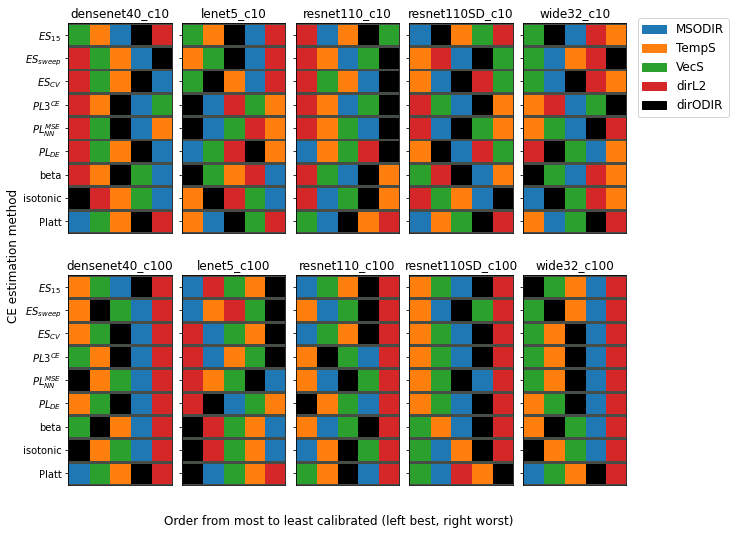

In [138]:
import matplotlib.patches as mpatches

df_real_new = df_real[(df_real.n_data == 3000) & df_real.model_name.isin(mod_names)]
column = "c_hat_distance_p_debiased"

#ECE_methods = ["eq_size_5", "eq_size_10", "eq_size_15", "eq_size_20", "monotonic_eq_size", "eq_size_CV10tr", 'PW_NN2_trick'] #
#labels = ["$ES_{5}$","$ES_{10}$", "$ES_{15}$", "$ES_{20}$", "$ES_{sweep}$", "$ES_{CV}$", "$PL$"]

m_size = 385

cal_funs = sorted(df_real_new.calibration_function.unique())

def ECE_to_order(ECEs):
    return np.argsort(np.argsort(ECEs))

def calibration_fun_colors(cal_funs):
    colors = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', "black", '#7f7f7f', '#bcbd22', '#17becf', 'orange', 'yellow', 'grey', 'green', "white", "red"])
    #print(np.argsort(cal_funs))
    return colors[np.argsort(cal_funs)]

ncols = 5
nrows = 2
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(10,8.5), sharey=True, sharex=True)
plt.subplots_adjust(wspace=0.1)   

for idx, data_name in enumerate(mod_names):

    tick = 0
    ax[idx // ncols][idx % ncols].set_title(data_name)

    df_sel = df_real_new[(df_real_new["model_name"] == data_name)]
    
    for method_idx, ECE_method in enumerate(ECE_methods):

        sel = df_sel[(df_sel["binning"] == ECE_method)].sort_values(by="calibration_function")

        ax[idx // ncols][idx % ncols].scatter(ECE_to_order(sel[column]), [tick]*len(sel), 
                                              color=calibration_fun_colors(sel.calibration_function), marker="s", s=m_size)
        tick += 1

    ax[idx // ncols][idx % ncols].set_xlim(-0.5,4.5)
    ax[idx // ncols][idx % ncols].set_ylim(-0.5,tick-0.5)
    ax[idx // ncols][idx % ncols].set_facecolor("#464d47")

fig.text(0.5, 0.06, 'Order from most to least calibrated (left best, right worst)', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'CE estimation method', va='center', rotation='vertical', fontsize=12)
plt.yticks(range(tick), labels=labels)

color_legend = [mpatches.Patch(color=calibration_fun_colors(cal_funs)[i], label=cal_funs[i]) for i in range(len(cal_funs))]

plt.xticks([])
plt.legend(handles=color_legend, bbox_to_anchor=(1.05, 2.25), loc='upper left', fontsize=12)
plt.savefig(f"fig/ordering_conflicts.pdf", dpi=250, bbox_inches="tight")
plt.show()